In [29]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


### 1. Determine all the variable types and find the fraction of the missing values for each variable.

In [4]:
# Investigate variable types
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [5]:
# Use .isnull() to check for missing values
education_df.isnull()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
1488,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
1489,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
1490,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False


In [6]:
# Find the fraction of missing values for each variable
# .isnull().count() includes missing values in the count
# .count() does not include missing values in the count
education_df.isnull().sum() / education_df.isnull().count() * 100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

### 2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

ENROLL                          17.627346 (imputation - fill with mean of values from same state, if possible)
TOTAL_REVENUE                   14.209115 (imputation - fill with mean of values from same state, if possible)
FEDERAL_REVENUE                 14.209115 (imputation - fill with mean of values from same state, if possible)
STATE_REVENUE                   14.209115 (imputation - fill with mean of values from same state, if possible)
LOCAL_REVENUE                   14.209115 (imputation - fill with mean of values from same state, if possible)
TOTAL_EXPENDITURE               14.209115 (imputation - fill with mean of values from same state, if possible)
INSTRUCTION_EXPENDITURE         14.209115 (imputation - fill with mean of values from same state, if possible)
SUPPORT_SERVICES_EXPENDITURE    14.209115 (imputation - fill with mean of values from same state, if possible)
OTHER_EXPENDITURE               17.627346 (imputation - fill with mean of values from same state, if possible)
CAPITAL_OUTLAY_EXPENDITURE      14.209115 (imputation - fill with mean of values from same state, if possible)
GRADES_PK_G                     11.595174 (imputation - fill with mean of values from same state, if possible)
GRADES_KG_G                      8.847185 (imputation - fill with mean of values from same state, if possible)
GRADES_4_G                       8.780161 (imputation - fill with mean of values from same state, if possible)
GRADES_8_G                       8.780161 (imputation - fill with mean of values from same state, if possible)
GRADES_12_G                      8.780161 (imputation - fill with mean of values from same state, if possible)
GRADES_1_8_G                     8.780161 (imputation - fill with mean of values from same state, if possible)
GRADES_9_12_G                    8.780161 (imputation - fill with mean of values from same state, if possible)
GRADES_ALL_G                    11.595174 (imputation - fill with mean of values from same state, if possible)
AVG_MATH_4_SCORE                64.075067 (toss -- majority of values are missing)
AVG_MATH_8_SCORE                64.343164 (toss -- majority of values are missing)
AVG_READING_4_SCORE             64.276139 (toss -- majority of values are missing)
AVG_READING_8_SCORE             66.621984 (toss -- majority of values are missing)

In [7]:
# Replace missing values with mean of given variable.
education_df2 = education_df.copy()

columns = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
           'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE',
           'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G',
           'GRADES_ALL_G']

for column in columns:
    education_df2[column] = round(education_df2[column].fillna(education_df2[column].mean()), 0)

education_df2.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,915931.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,915931.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,915931.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,915931.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,915931.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [8]:
# Check that missing values were filled in
education_df2.isnull().sum() / education_df2.isnull().count() * 100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [9]:
# Replace missing values with mean of values from same state.
education_df3 = education_df.copy()

for column in columns:
    education_df3[column] = round(education_df3[column].fillna(education_df3.groupby('STATE')[column].transform('mean')), 0)

education_df3.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,736584.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,130430.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,874322.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,451902.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,5945343.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [10]:
# Check that missing values were filled in
education_df3.isnull().sum() / education_df3.isnull().count() * 100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          10.790885
TOTAL_REVENUE                   10.790885
FEDERAL_REVENUE                 10.790885
STATE_REVENUE                   10.790885
LOCAL_REVENUE                   10.790885
TOTAL_EXPENDITURE               10.790885
INSTRUCTION_EXPENDITURE         10.790885
SUPPORT_SERVICES_EXPENDITURE    10.790885
OTHER_EXPENDITURE               10.790885
CAPITAL_OUTLAY_EXPENDITURE      10.790885
GRADES_PK_G                      2.747989
GRADES_KG_G                      0.268097
GRADES_4_G                       0.268097
GRADES_8_G                       0.268097
GRADES_12_G                      0.268097
GRADES_1_8_G                     0.268097
GRADES_9_12_G                    0.268097
GRADES_ALL_G                     2.747989
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [11]:
# Replace missing values with mean of values from same state, if possible. Otherwise,
# replace with mean of given variable.
education_df4 = education_df.copy()

for column in columns:
    education_df4[column] = round(education_df4[column].fillna(education_df4.groupby('STATE')[column].transform('mean')), 0)
    education_df4[column] = round(education_df4[column].fillna(education_df4[column].mean()), 0)

education_df4.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,736584.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,130430.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,874322.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,451902.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,5945343.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [12]:
# Check that missing values were filled in
education_df4.isnull().sum() / education_df4.isnull().count() * 100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [13]:
# Check to make sure education_df has remained untouched
education_df.isnull().sum() / education_df.isnull().count() * 100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

### 3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [14]:
# Replace missing values with mean of values from same year
education_df5 = education_df.copy()

for column in columns:
    education_df5[column] = round(education_df5[column].fillna(education_df5.groupby('YEAR')[column].transform('mean')), 0)

education_df5.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [15]:
# Check that missing values were filled in
education_df5.isnull().sum() / education_df5.isnull().count() * 100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           7.171582
TOTAL_REVENUE                    3.418231
FEDERAL_REVENUE                  3.418231
STATE_REVENUE                    3.418231
LOCAL_REVENUE                    3.418231
TOTAL_EXPENDITURE                3.418231
INSTRUCTION_EXPENDITURE          3.418231
SUPPORT_SERVICES_EXPENDITURE     3.418231
OTHER_EXPENDITURE                7.171582
CAPITAL_OUTLAY_EXPENDITURE       3.418231
GRADES_PK_G                      6.836461
GRADES_KG_G                      6.836461
GRADES_4_G                       6.836461
GRADES_8_G                       6.836461
GRADES_12_G                      6.836461
GRADES_1_8_G                     6.836461
GRADES_9_12_G                    6.836461
GRADES_ALL_G                     6.836461
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [16]:
# Replace missing values with mean of values from same year, if possible.  Otherwise,
# replace with mean of given variable.
education_df6 = education_df.copy()

for column in columns:
    education_df6[column] = round(education_df6[column].fillna(education_df6.groupby('YEAR')[column].transform('mean')), 0)
    education_df6[column] = round(education_df6[column].fillna(education_df6[column].mean()), 0)

education_df6.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,916165.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,916165.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,916165.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,916165.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,916165.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [17]:
# # Check that missing values were filled in
education_df6.isnull().sum() / education_df6.isnull().count() * 100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

### 4. This time, fill in the missing values using interpolation (extrapolation).

In [18]:
# Replace missing values using interpolation
education_df7 = education_df.copy()

for column in columns:
    education_df7[column] = education_df7[column].interpolate()

education_df7.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [19]:
# Check that missing values were filled in
education_df7.isnull().sum() / education_df7.isnull().count() * 100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           2.412869
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                2.412869
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

### 5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [24]:
for column in columns:
    print('\nStatistics for Column: {}\n'.format(column))
    print(pd.concat([education_df[column], education_df2[column], education_df3[column],
                     education_df4[column], education_df5[column], education_df6[column],
                     education_df7[column]], axis=1).describe())


75%     5.080939e+06   4.269811e+06   5.125108e+06   4.444259e+06   
max     5.090457e+07   5.090457e+07   5.090457e+07   5.090457e+07   

       STATE_REVENUE  STATE_REVENUE  STATE_REVENUE  
count   1.441000e+03   1.492000e+03   1.492000e+03  
mean    4.213597e+06   4.213597e+06   4.913351e+06  
std     5.237195e+06   5.146846e+06   5.423675e+06  
min     0.000000e+00   0.000000e+00   0.000000e+00  
25%     1.319582e+06   1.356434e+06   1.356434e+06  
50%     2.857497e+06   2.946394e+06   3.119414e+06  
75%     5.187230e+06   5.050045e+06   8.020633e+06  
max     5.090457e+07   5.090457e+07   5.090457e+07  

Statistics for Column: LOCAL_REVENUE

       LOCAL_REVENUE  LOCAL_REVENUE  LOCAL_REVENUE  LOCAL_REVENUE  \
count   1.280000e+03   1.492000e+03   1.331000e+03   1.492000e+03   
mean    4.109157e+06   4.109157e+06   4.109319e+06   4.109319e+06   
std     5.482971e+06   5.078230e+06   5.466576e+06   5.163003e+06   
min     2.209300e+04   2.209300e+04   2.209300e+04   2.209300e+04   

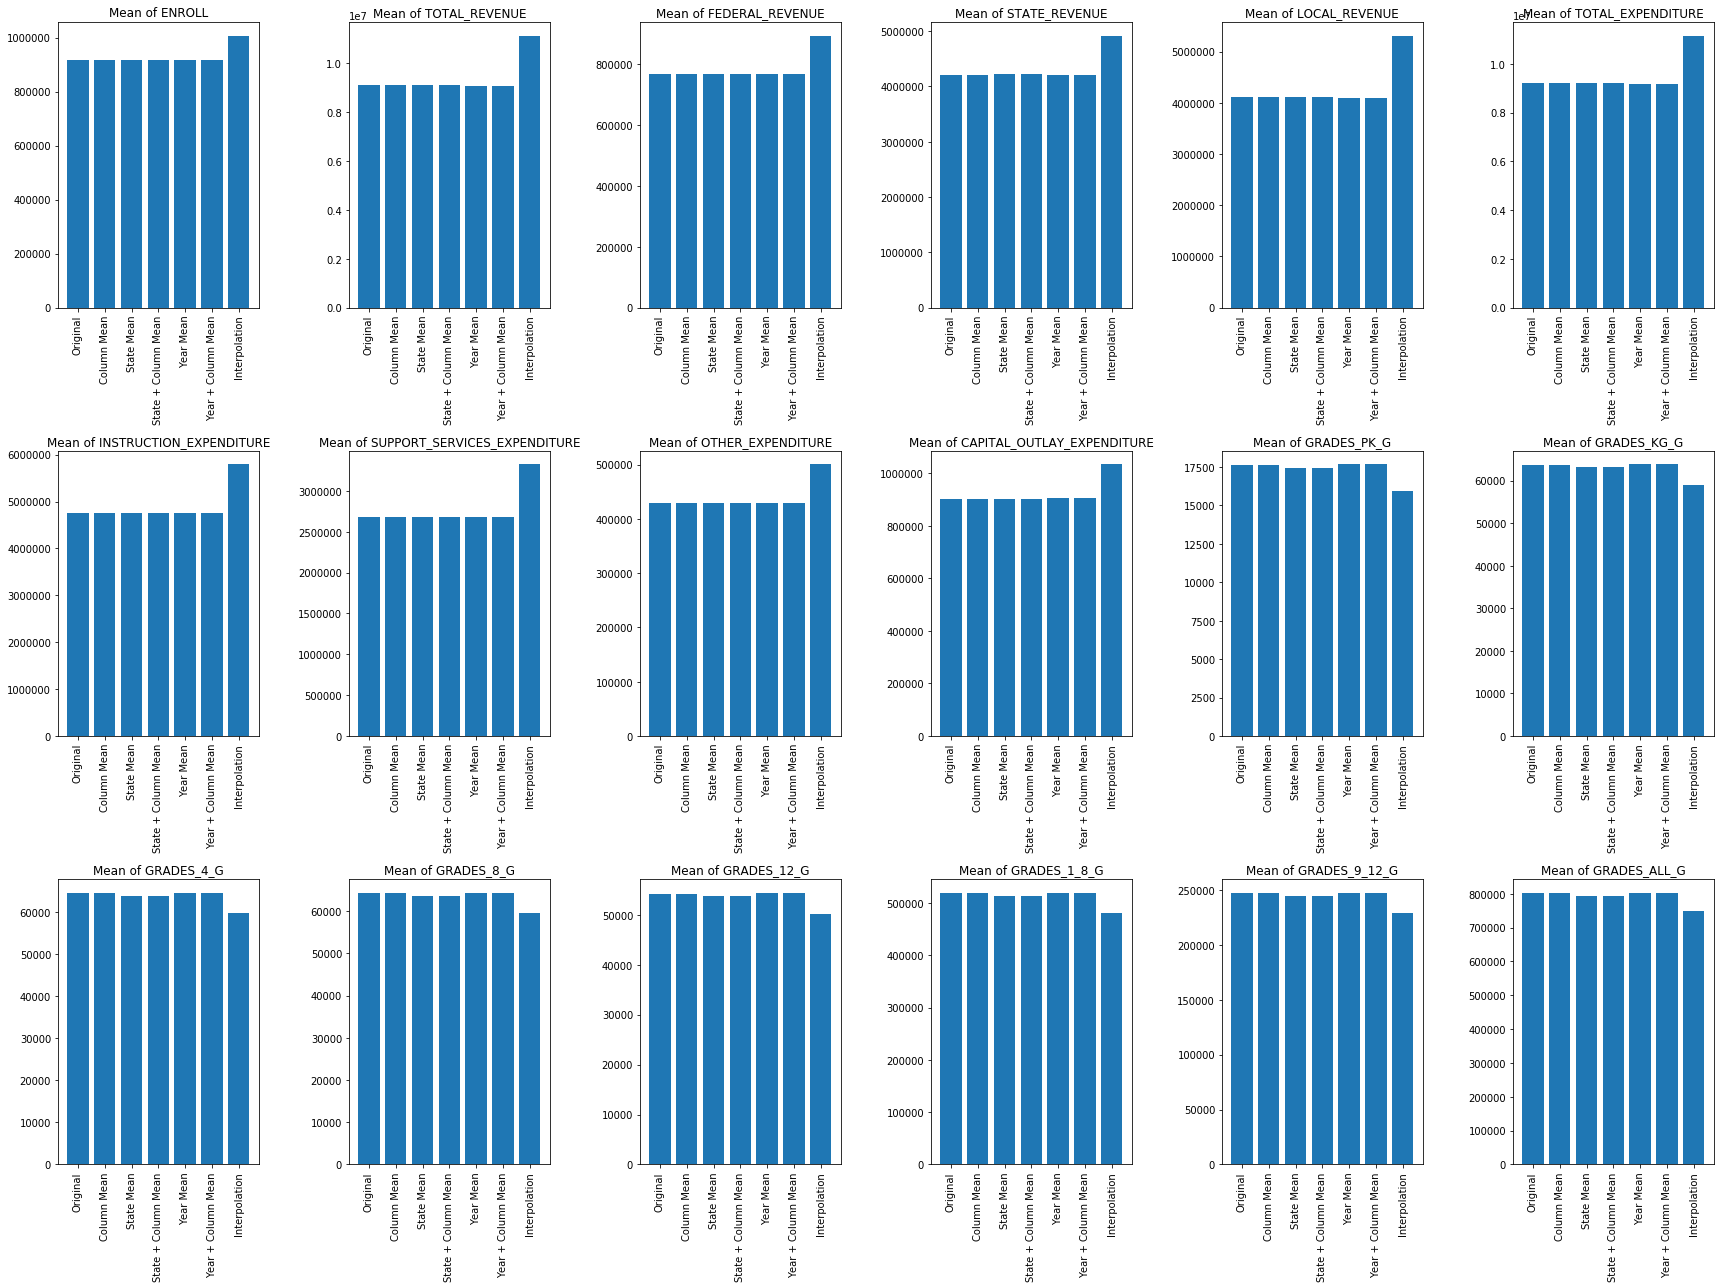

In [40]:
# Plot mean for each of the missing value methods
plt.figure(figsize=(24, 18))

for i, column in enumerate(columns):
    final_df = pd.concat([education_df[column], education_df2[column], education_df3[column],
                     education_df4[column], education_df5[column], education_df6[column],
                     education_df7[column]], axis=1)
    
    plt.subplot(3, 6, i + 1)
    plt.bar(['Original', 'Column Mean', 'State Mean', 'State + Column Mean', 'Year Mean', 'Year + Column Mean', 'Interpolation'], final_df.mean())
    plt.xticks(rotation='vertical')
    plt.title('Mean of {}'.format(column))

plt.tight_layout()
plt.show()

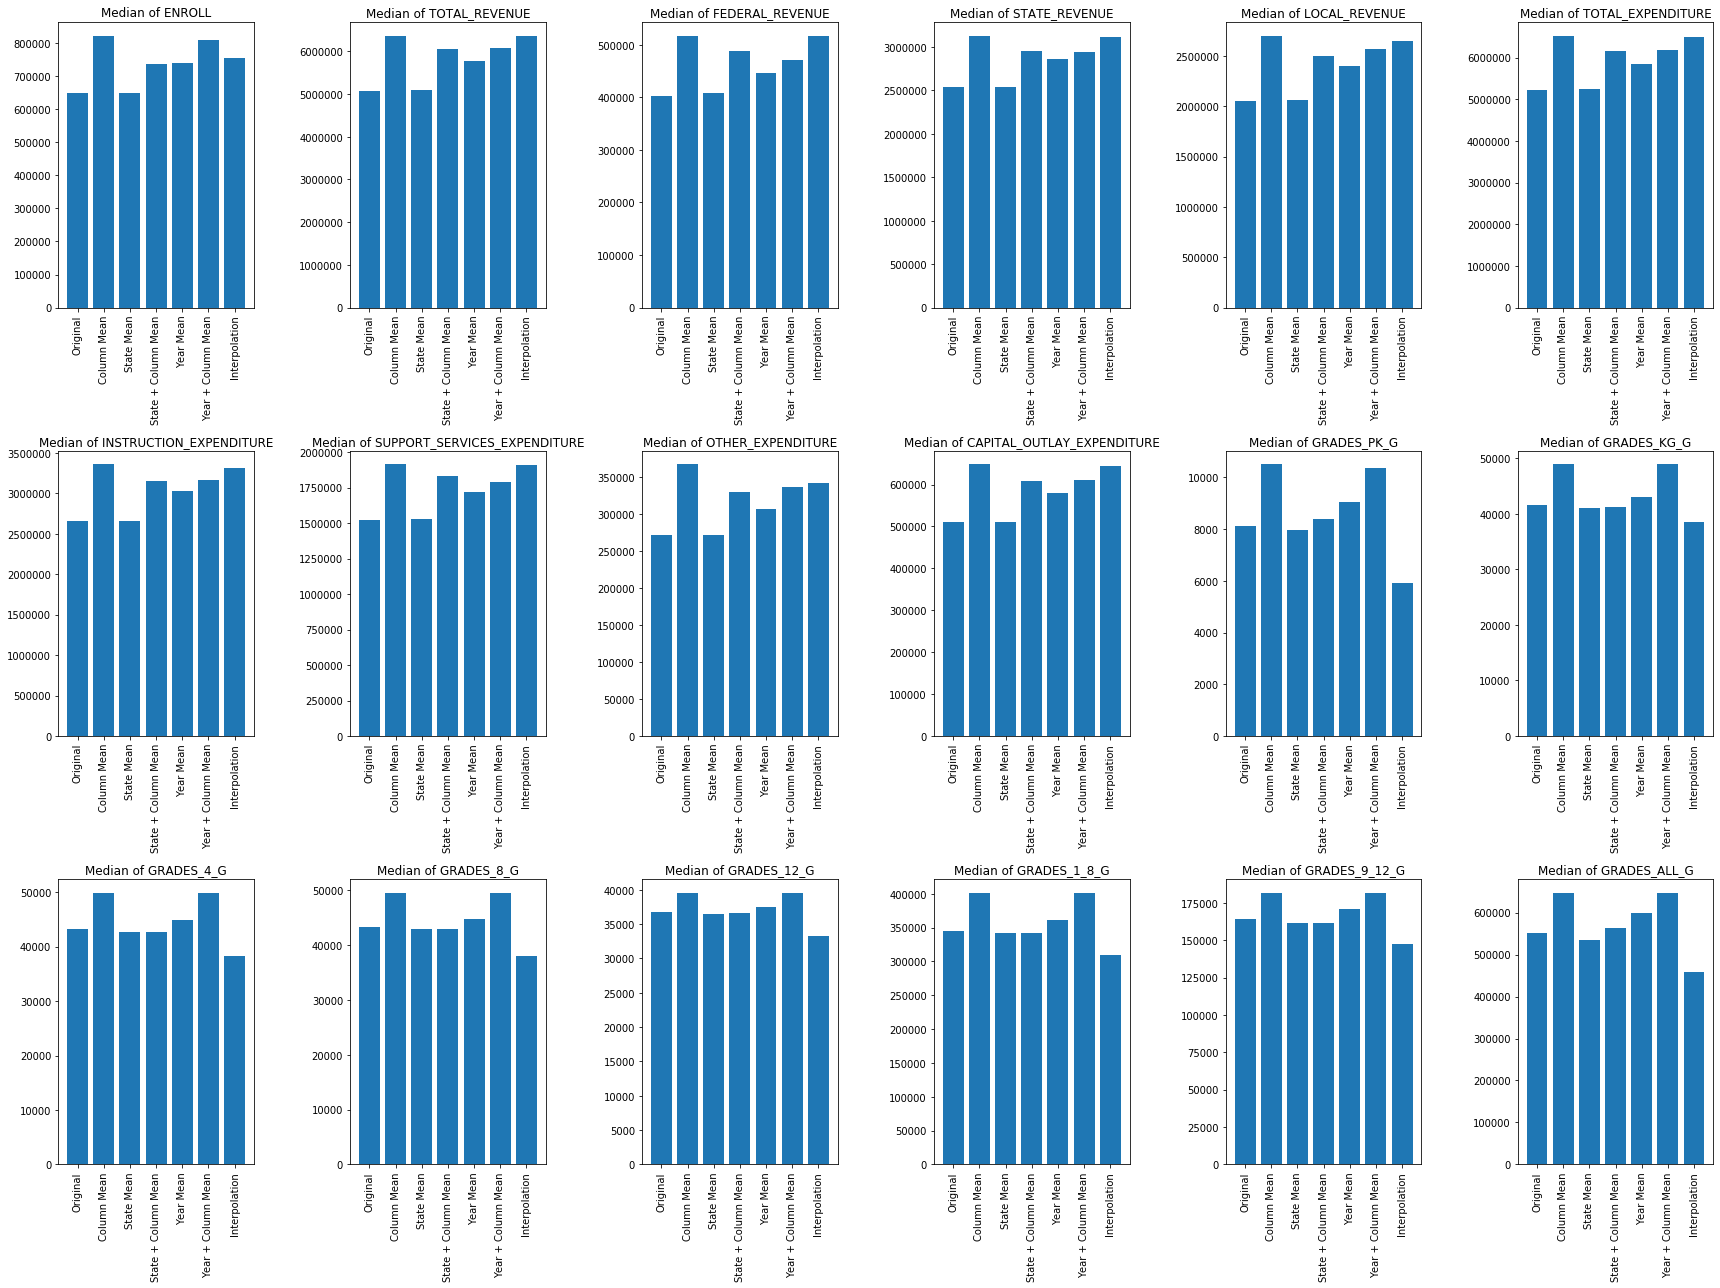

In [41]:
# Plot median for each of the missing value methods
plt.figure(figsize=(24, 18))

for i, column in enumerate(columns):
    final_df = pd.concat([education_df[column], education_df2[column], education_df3[column],
                     education_df4[column], education_df5[column], education_df6[column],
                     education_df7[column]], axis=1)
    
    plt.subplot(3, 6, i + 1)
    plt.bar(['Original', 'Column Mean', 'State Mean', 'State + Column Mean', 'Year Mean', 'Year + Column Mean', 'Interpolation'], final_df.median())
    plt.xticks(rotation='vertical')
    plt.title('Median of {}'.format(column))

plt.tight_layout()
plt.show()

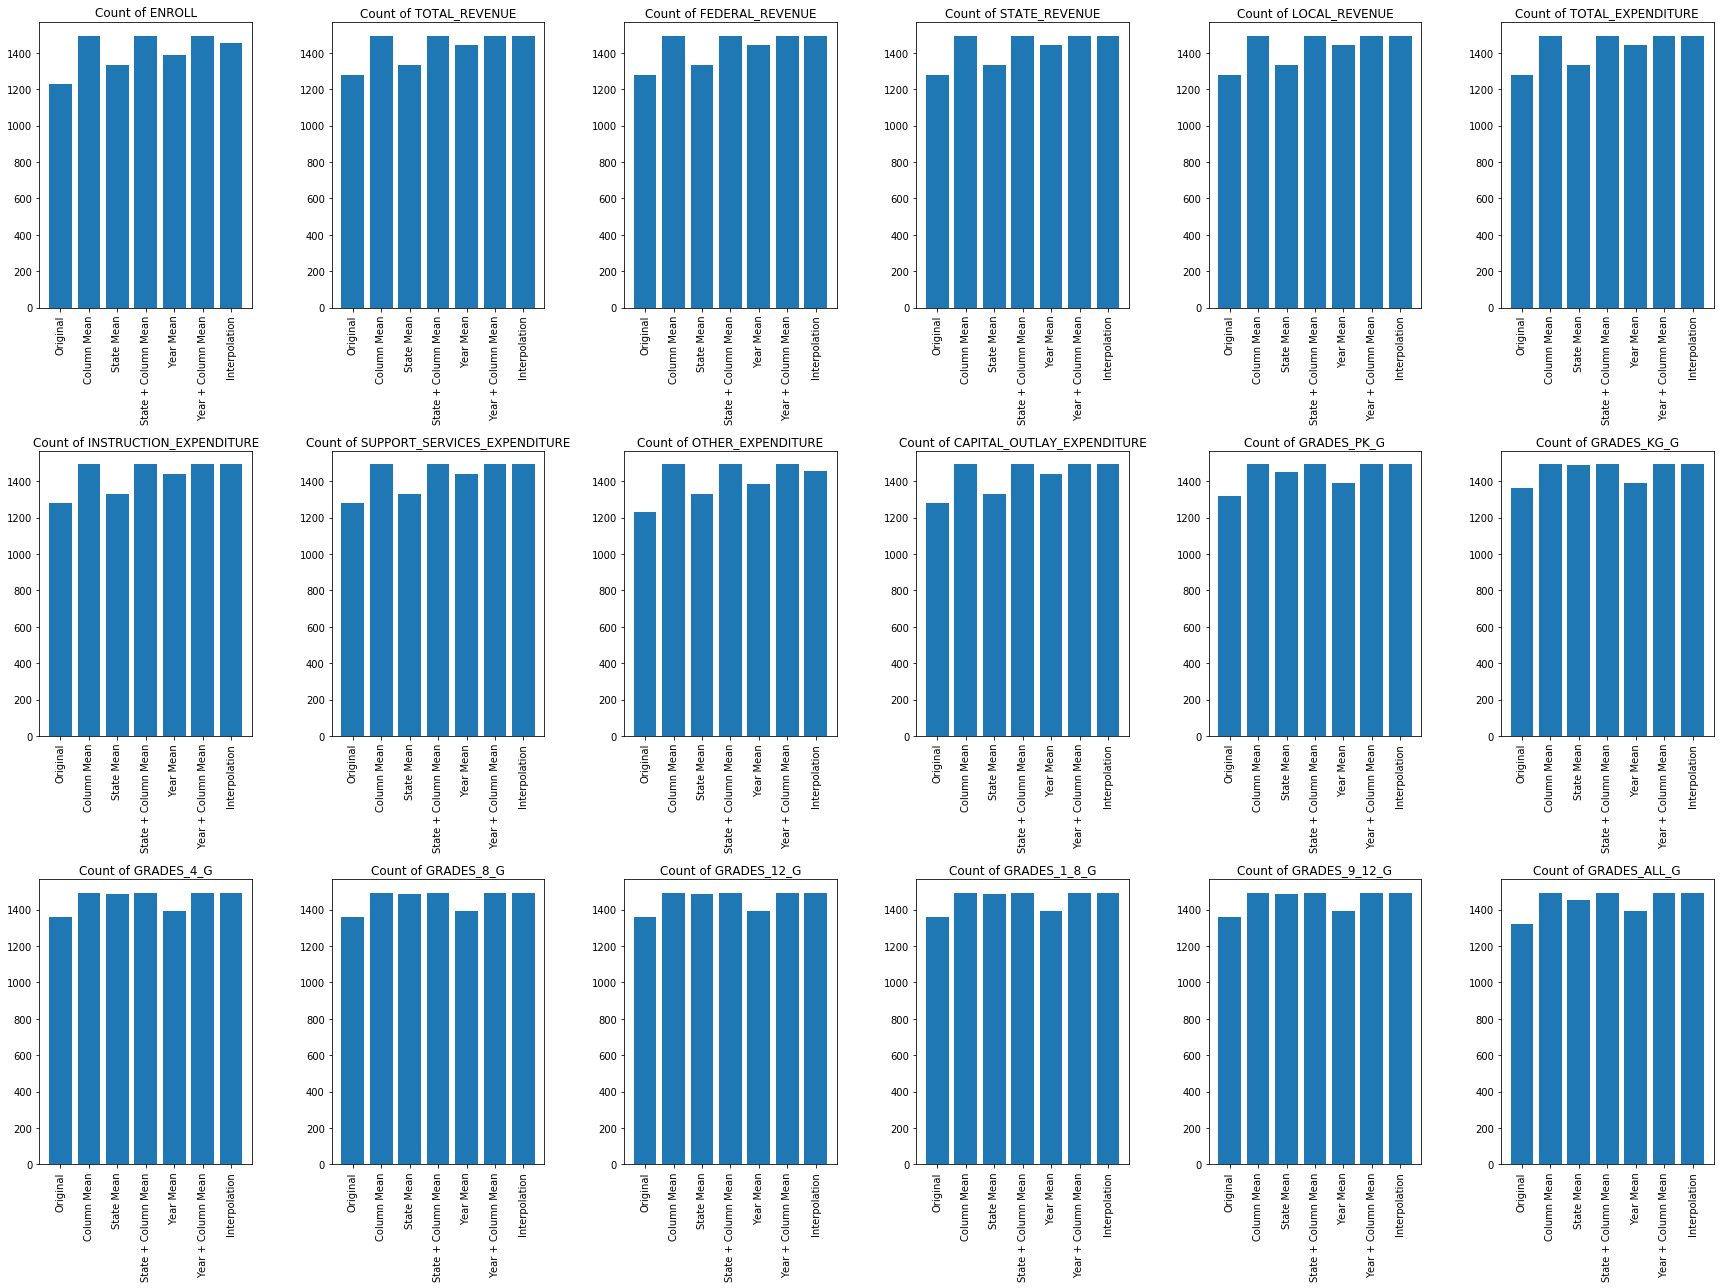

In [45]:
# Plot count for each of the missing value methods
plt.figure(figsize=(24, 18))

for i, column in enumerate(columns):
    final_df = pd.concat([education_df[column], education_df2[column], education_df3[column],
                     education_df4[column], education_df5[column], education_df6[column],
                     education_df7[column]], axis=1)
    
    plt.subplot(3, 6, i + 1)
    plt.bar(['Original', 'Column Mean', 'State Mean', 'State + Column Mean', 'Year Mean', 'Year + Column Mean', 'Interpolation'], final_df.count()    )
    plt.xticks(rotation='vertical')
    plt.title('Count of {}'.format(column))

plt.tight_layout()
plt.show()